In [19]:
# ===================================
# CNN Evaluation Pipeline
# ===================================

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [20]:
# -------------------------------
# CONFIG
# -------------------------------
MODEL_PATH = "cnn_lung_model_train_test_val.keras"  # or .h5
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
TEST_DIR = "lung_image_split/test"
CLASS_NAMES = ['lung_aca', 'lung_n', 'lung_scc']


In [21]:
# ------------------------------
# LOAD MODEL
# ------------------------------
model = tf.keras.models.load_model(MODEL_PATH)
print("✅ CNN model loaded successfully.")

✅ CNN model loaded successfully.


In [22]:
# -------------------------------
# LOAD TEST DATA
# -------------------------------
test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=False
)
test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))


Found 3000 files belonging to 3 classes.


In [23]:
# -------------------------------
# PREDICTIONS
# -------------------------------
y_true, y_pred, y_score = [], [], []


In [24]:
for images, labels in test_ds:
    probs = model.predict(images)
    y_score.extend(probs)
    y_pred.extend(np.argmax(probs, axis=1))
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_score = np.array(y_score)


1/1 [==============================] - 0s 440ms/step


In [25]:
# -------------------------------
# CLASSIFICATION REPORT
# -------------------------------
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))




📊 Classification Report:

              precision    recall  f1-score   support

    lung_aca       0.90      0.95      0.92      1000
      lung_n       1.00      0.98      0.99      1000
    lung_scc       0.95      0.91      0.93      1000

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



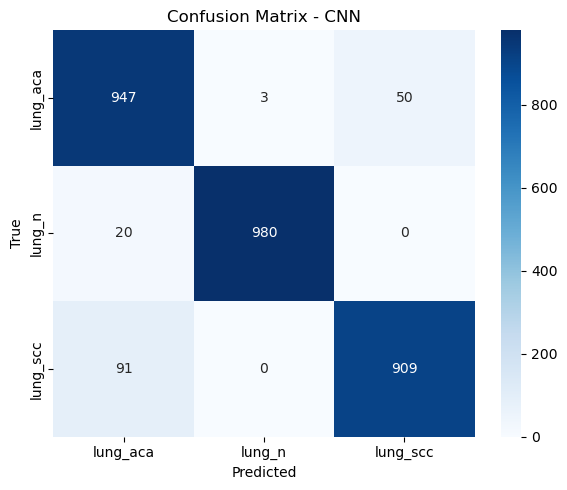

In [26]:
# -------------------------------
# CONFUSION MATRIX
# -------------------------------
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - CNN")
plt.tight_layout()
plt.show()

In [27]:
# ------------------------------
# PER-CLASS ACCURACY
# ------------------------------
correct = cm.diagonal()
total = cm.sum(axis=1)
class_acc = correct / total

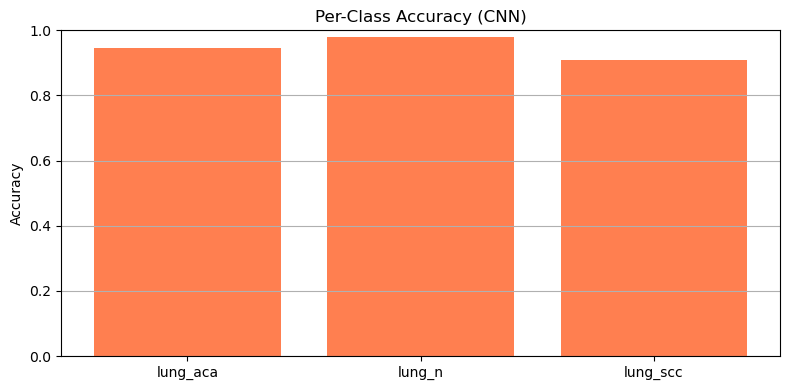

In [28]:
plt.figure(figsize=(8, 4))
plt.bar(class_names, class_acc, color='coral')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy (CNN)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


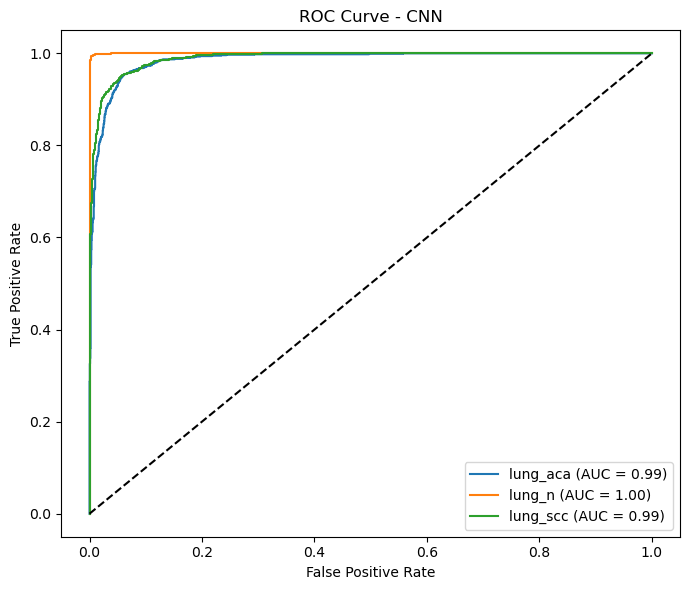

In [29]:
# -------------------------------
# ROC CURVE
# -------------------------------
y_true_bin = label_binarize(y_true, classes=range(len(CLASS_NAMES)))
plt.figure(figsize=(7, 6))

for i in range(len(CLASS_NAMES)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{CLASS_NAMES[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CNN")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
